<a href="https://colab.research.google.com/github/KennethLengo/MISTEST2026/blob/dev/ML_BASICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coding Exercise - ML Basics**

**Part 1 - Predict house prices based on square footage and location:**

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Generate sample data
# ChatGPT prompts with 100+ rows
data = '/content/housing_with_location.csv'
df = pd.read_csv(data)

# Features and target
X = df[['square_footage', 'location']]
y = df['price']

# Preprocessing: One-hot encode the location column
preprocessor = ColumnTransformer(
transformers=[
('location', OneHotEncoder(sparse_output=False), ['location'])
], remainder='passthrough')

# Create pipeline with preprocessing and model
model = Pipeline(steps=[
('preprocessor', preprocessor),
('regressor', LinearRegression())
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Train model
model.fit(X_train, y_train)

# Make prediction for a new house: 2000 sq ft in each location (Downtown, Suburb, or Rural)
new_houses = pd.DataFrame({'square_footage': [2000, 2000, 2000], 'location': ['Downtown', 'Suburb', 'Rural']})
predicted_prices = model.predict(new_houses)
for location, price in zip(new_houses['location'], predicted_prices):
  print(f"Predicted price for a 2000 sq ft house in {location}: ${price:,.2f}")

# Display model coefficients
feature_names = (model.named_steps['preprocessor'].named_transformers_['location'].get_feature_names_out(['location'])).tolist() +['square_footage']
coefficients = model.named_steps['regressor'].coef_
print("\nModel Coefficients:")
for feature, coef in zip(feature_names, coefficients):
  print(f"{feature}: {coef:.2f}")

# Explanations And Interpretations of Data
print('\nThis model predicts that the downtown location has the strongest positive effect on the price, with a model coefficient of 1709.61. This means that a house in downtown will cost $1709.61 more than the reference location.')
print('This model predicts that the rural location has the strongest negative effect on the price, with a model coefficient of -1670.88. This means that a rural house would be 1670.88 less than the reference location')
print('This model predicts that the suburb location has the most minimal effect, with a model coefficient of -38.72. This means that a suburb house would be close in price to the reference location.')
print('The square foot coefficient implies that each additional sqaure foot is going to cost $230.28, regardless of the location.')
print('The improvements made include printing the predicted prices for each types of home, allowing for effective comparison across locations.')




Predicted price for a 2000 sq ft house in Downtown: $465,920.63
Predicted price for a 2000 sq ft house in Suburb: $464,172.31
Predicted price for a 2000 sq ft house in Rural: $462,540.15

Model Coefficients:
location_Downtown: 1709.61
location_Rural: -1670.88
location_Suburb: -38.72
square_footage: 230.28

This model predicts that the downtown location has the strongest positive effect on the price, with a model coefficient of 1709.61. This means that a house in downtown will cost $1709.61 more than the reference location.
This model predicts that the rural location has the strongest negative effect on the price, with a model coefficient of -1670.88. This means that a rural house would be 1670.88 less than the reference location
This model predicts that the suburb location has the most minimal effect, with a model coefficient of -38.72. This means that a suburb house would be close in price to the reference location.
The square foot coefficient implies that each additional sqaure foot 

**Part 2 - Predict Customer Churn:**

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report


# Generate sample customer data
# ChatGPT prompts with 100+ rows
data = '/content/customer_churn_dataset.csv'
df = pd.read_csv(data)

# Features and target
X = df[['age', 'monthly_usage_hours', 'purchase_amount', 'customer_service_calls',
'region']]
y = df['churn']

# Preprocessing: Scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
transformers=[
('num', StandardScaler(), ['age', 'monthly_usage_hours', 'purchase_amount',
'customer_service_calls']),
('cat', OneHotEncoder(sparse_output=False), ['region'])
])

# Create pipeline with preprocessing and model
model = Pipeline(steps=[
('preprocessor', preprocessor),
('classifier', LogisticRegression(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict using data set
y_pred = model.predict(X_test)

# Assess accuracy of model using prediction data
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Predict churn probability for a new customer
new_customer = pd.DataFrame({
'age': [35],
'monthly_usage_hours': [20],
'purchase_amount': [150],
'customer_service_calls': [5],
'region': ['West']
})

# Probability of churn (class 1)
churn_probability = model.predict_proba(new_customer)[0][1]

# Classify based on threshold (0.5)
threshold = 0.5
churn_prediction = 1 if churn_probability > threshold else 0
print(f"Churn Probability For New Customer: {churn_probability:.2f}")
print(f"Churn Prediction (1 = churn, 0 = no churn): {churn_prediction}")

# Display model coefficients
feature_names = (model.named_steps['preprocessor']
.named_transformers_['cat']
.get_feature_names_out(['region'])).tolist() + ['age',
'monthly_usage_hours', 'purchase_amount', 'customer_service_calls']
coefficients = model.named_steps['classifier'].coef_[0]
print("\nModel Coefficients:")
for feature, coef in zip(feature_names, coefficients):
  print(f"{feature}: {coef:.2f}")

# Explanations And Interpretations of Data
print('''\nThe churn rate basically refers to the percentage of customers who stop buying a product or service within a certain time frame. A lower churn proability is desirable,
as it means the business has a higher chance of retaining the customer. In this scenario, the churn threshold of 0.5 means that a customer is believed to leave if the churn rate
probability is above 0.5, while staying if it is below 0.5. \n''')


print('''The Classification Report Table shows the business how accurate the model is at predicting churn. Despite 100% test accuracy, the model will require further testing to ensure it performs consistently on new data.''')

print('''\nFor the region coefficients, region plays a significant role in decreasing or increasing churn. Since the model seperates the churn of customers in different
regions, it provides the business with proper insights on which locations to target in order to retain customers. For example, customers in the West and East regions show a higher likelihood of
churn due to the positive coefficients. Customers in the North and South regions exhibit a lower likelihood of churn due to their negative coefficients.

The East Region's coefficient of 0.24 suggests a slight increase in churn, while the North region's coefficient of -1.52 has a significant decrease in churn. The South region has a coeffieicnt of -1.41 and that suggests
that the chance of churn is greatly reduced. The West region's coefficient of 1.85 implies that there is notably greater chance of churn.
Age slightly increases the chance of churn, because the coefficient (0.20) is modest. Monthly usage hours is 0.03, which means that is has a minimal effect on increasing churn.
Higher purchase amounts somewhat reduce churn. Lastly, more customer service calls has a tiny effect in increasing churn.''')


Accuracy on Test Set: 1.00
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Churn Probability For New Customer: 0.12
Churn Prediction (1 = churn, 0 = no churn): 0

Model Coefficients:
region_East: 0.24
region_North: -1.52
region_South: -1.41
region_West: 1.85
age: 0.20
monthly_usage_hours: 0.03
purchase_amount: -0.28
customer_service_calls: 0.04

The churn rate basically refers to the percentage of customers who stop buying a product or service within a certain time frame. A lower churn proability is desirable,
as it means the business has a higher chance of retaining the customer. In this scenario, the churn threshold of 0.5 means that a customer is believed to leave if the chu

**Part 3 - Customer Segmentation:**

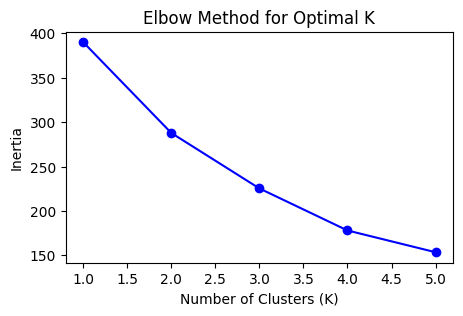

Cluster Characteristics:
         annual_spending  purchase_frequency    age
cluster                                            
0                 857.91               19.46  50.94
1                1273.17               13.33  27.40
2                 843.17                6.98  46.68

Cluster 0 Strategy:
Frequent buyers: Provide bulk discounts or subscription plans.

Cluster 1 Strategy:
High-spending customers: Offer exclusive promotions or loyalty rewards.

Cluster 2 Strategy:
Low-engagement customers: Send personalized re-engagement campaigns.

The elbow method graph shows how inertia decreases as the number of clusters is increased. This elbow method
helps determine the optimal amount of clusters, by finding the point where adding more clusters no longer significantly
improves clustering performance. In this case, the optimal point is 3 clusters.

Cluster 0 represents the oldest customers who make the most purchases per year, and spend moderately.
Cluster 1 represents the youngest c

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate sample customer data
# ChatGPT prompts with 100+ rows
df = pd.read_csv('/content/customer_spending_dataset.csv')

# Preprocess data: Select numerical features and scale them
features = ['annual_spending', 'purchase_frequency', 'age']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
inertia = []
K = range(1, 6)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(5, 3))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.savefig('elbow_plot.png')
plt.show() #Dispays the plot in the output
plt.close()

# Apply K-Means with optimal K (e.g., 3 based on elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
cluster_summary = df.groupby('cluster')[features].mean().round(2)
print("Cluster Characteristics:")
print(cluster_summary)

# Example of targeted strategies
for cluster in range(optimal_k):
  print(f"\nCluster {cluster} Strategy:")
  if cluster_summary.loc[cluster, 'annual_spending'] > 1000:
    print("High-spending customers: Offer exclusive promotions or loyalty rewards.")
  elif cluster_summary.loc[cluster, 'purchase_frequency'] > 10:
    print("Frequent buyers: Provide bulk discounts or subscription plans.")
  else:
    print("Low-engagement customers: Send personalized re-engagement campaigns.")

# Save cluster assignments to CSV
df.to_csv('customer_segments.csv', index=False)

# Explanations And Interpretations of Data
print('''\nThe elbow method graph shows how inertia decreases as the number of clusters is increased. This elbow method
helps determine the optimal amount of clusters, by finding the point where adding more clusters no longer significantly
improves clustering performance. In this case, the optimal point is 3 clusters.''')
print('\nCluster 0 represents the oldest customers who make the most purchases per year, and spend moderately.''')
print('Cluster 1 represents the youngest customers who make moderate purchases per year, and spend the most.')
print('Cluster 2 represents the middle-aged customers who make the least purchases per year, and spend the least')

**Extra Credit - AI Powered Demand Housing Price Forecasting Tool:**

   month  predicted_sales
0     13     2.034848e+06
1     14     2.118030e+06
2     15     2.201212e+06
3     16     2.284394e+06
4     17     2.367576e+06
5     18     2.450758e+06


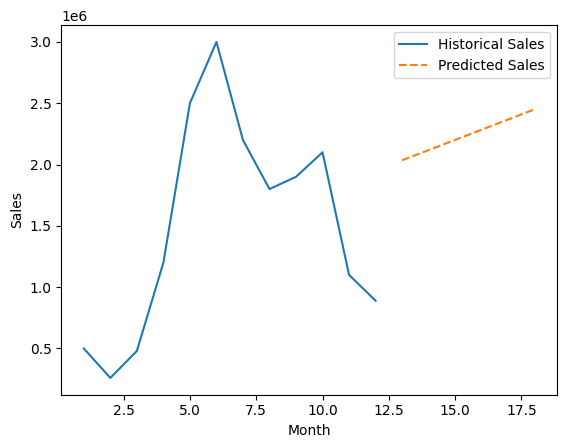


The graph depicts strong growth up leading up to the spike around the sixth month, which is then followed by a decline lasting until the 12 month.
However, the model predicts that sales from month 13 to 18, will see a steady increase from about $2 million to $2.5 million. A negative of the linear
regression model is that it doesn't account for voltatility or any sudden changes in sales, as it assumes a constant trend upward.


In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/sales_data.csv')  # Ensure columns: 'month', 'sales'
X = df[['month']]
y = df['sales']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict for next 6 months
future_months = pd.DataFrame({'month': range(max(df['month'])+1, max(df['month'])+7)})

future_predictions = model.predict(future_months)

predicted_df = pd.DataFrame({
    'month': future_months['month'],
    'predicted_sales': future_predictions})
print(predicted_df)

# Plot results
plt.plot(df['month'], y, label='Historical Sales')
plt.plot(future_months['month'], future_predictions, label='Predicted Sales', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Explanations And Interpretations of Data
print('''\nThe graph depicts strong growth up leading up to the spike around the sixth month, which is then followed by a decline lasting until the 12 month.
However, the model predicts that sales from month 13 to 18, will see a steady increase from about $2 million to $2.5 million. A negative of the linear
regression model is that it doesn't account for voltatility or any sudden changes in sales, as it assumes a constant trend upward.''')